# Estudio del dinero en el tiempo

En este laboratorio usted aprenderá el concepto de **valor del dinero en el tiempo**.

El valor del dinero en el tiempo es aquella función que nos dice cuánto varía el valor del dinero de un período de tiempo respecto de otro, por ejemplo:

En Chile hace 20 años, el sueldo mínimo era $115.648$ y para el año 2022 era de $400.000$ ¿ha crecido el sueldo mínimo en $284.352 reales? La respuesta es que no, el valor de ese incremento se tiene que analizar respecto de la **inflación** acumulada durante los últimos 20 años.

El valor del dinero en el tiempo se explica mediante la siguiente función:

$$V_{hoy} =  V_{tiempopasado} \times (1 + i)^n$$

Donde:

$i$: es el **valor promedio** de la inflación desde el tiempo pasado hasta hoy.
$n$: es el **número de períodos** (en este caso años) que han pasado desde el pasado hasta hoy.

La tabla de inflación es la siguiente:

| Año            | Inflación Anual (Dic resp. Dic) |
|----------------|---------------------------------|
| IPC Chile 2022 | 12,79%                          |
| IPC Chile 2021 | 7,17%                           |
| IPC Chile 2020 | 2,97%                           |
| IPC Chile 2019 | 3,00%                           |
| IPC Chile 2018 | 2,57%                           |
| IPC Chile 2017 | 2,27%                           |
| IPC Chile 2016 | 2,71%                           |
| IPC Chile 2015 | 4,38%                           |
| IPC Chile 2014 | 4,64%                           |
| IPC Chile 2013 | 2,84%                           |
| IPC Chile 2012 | 1,49%                           |
| IPC Chile 2011 | 4,44%                           |
| IPC Chile 2010 | 2,97%                           |
| IPC Chile 2009 | -2,58%                          |
| IPC Chile 2008 | 7,09%                           |
| IPC Chile 2007 | 7,82%                           |
| IPC Chile 2006 | 2,57%                           |
| IPC Chile 2005 | 3,66%                           |
| IPC Chile 2004 | 2,43%                           |
| IPC Chile 2003 | 1,07%                           |

Además, el valor del dólar promedio es de $940$ CLP.

Cree una función para calcular el valor promedio. 

In [2]:
def promedio_ipc(valores_ipc):
    """
    Calcula el valor promedio de una lista de IPCs.
    
    Args:
    - valores_ipc (list of float): Lista con los valores de IPC.
    
    Returns:
    - float: Valor promedio del IPC.
    """
    return sum(valores_ipc) / len(valores_ipc)

# Valores de IPC proporcionados anteriormente para probar la función
valores_ipc = [12.79, 7.17, 2.97, 3.00, 2.57, 2.27, 2.71, 4.38, 4.64, 2.84, 
               1.49, 4.44, 2.97, -2.58, 7.09, 7.82, 2.57, 3.66, 2.43, 1.07]

promedio = promedio_ipc(valores_ipc)
round(promedio,3)

3.815

# La variación del sueldo

El histórico del sueldo mínimo en Chile ha variado de la siguiente manera:

| Año  | Monto     |
|------|-----------|
| 2003 | 115.648   |
| 2004 | 120.000   |
| 2005 | 127.500   |
| 2006 | 135.000   |
| 2007 | 144.000   |
| 2008 | 159.000   |
| 2009 | 165.000   |
| 2010 | 172.000   |
| 2011 | 182.000   |
| 2012 | 193.000   |
| 2013 | 210.000   |
| 2014 | 225.000   |
| 2015 | 241.000   |
| 2016 | 257.500   |
| 2017 | 270.000   |
| 2018 | 288.000   |
| 2019 | 301.000   |
| 2020 | 326.500   |
| 2021 | 337.000   |
| 2022 | 400.000   |

De acuerdo a la función de valor de dinero en el tiempo $V_{hoy} =  V_{tiempopasado} \times (1 + i)^n$

Cree un dataframe en donde exista una nueva columna que diga el **valor actual** del dinero a hoy basado en el `promedio_ipc` calculado anteriormente.


In [4]:
import pandas as pd

datos = {
    'Año': list(range(2003, 2023)), 
    'Monto': [115648, 120000, 127500, 135000, 144000, 159000, 165000, 172000, 182000, 
              193000, 210000, 225000, 241000, 257500, 270000, 288000, 301000, 326500, 
              337000, 400000]
}

df = pd.DataFrame(datos)

i = promedio / 100 #Pasar el porcentaje a un valor decimal
n = 2022 - df['Año']

df['Valor actual'] = round(df['Monto'] * (1 + i) ** n,0)

df

,Año,Monto,Valor actual
0,2003,115648,235548.0
1,2004,120000,235431.0
2,2005,127500,240953.0
3,2006,135000,245751.0
4,2007,144000,252502.0
5,2008,159000,268558.0
6,2009,165000,268451.0
7,2010,172000,269556.0
8,2011,182000,274747.0
9,2012,193000,280646.0


# ¿Cuánto ha variado el sueldo realmente en cada período?

Si se considera el año base el 2003, este **no tendrá variación alguna**, analicemos cómo ha cambiado el sueldo mínimo porcentualmente creando una función en Python.

In [7]:
df['Aumento real %'] = round(df['Valor actual'].pct_change() * 100,3)

df

,Año,Monto,Valor actual,Aumento real %
0,2003,115648,235548.0,NaN
1,2004,120000,235431.0,-0.050
2,2005,127500,240953.0,2.345
3,2006,135000,245751.0,1.991
4,2007,144000,252502.0,2.747
5,2008,159000,268558.0,6.359
6,2009,165000,268451.0,-0.040
7,2010,172000,269556.0,0.412
8,2011,182000,274747.0,1.926
9,2012,193000,280646.0,2.147


La función `pct_change()`es un elemento especial de la librería `pandas` que permite calcular el cambio porcentual entre el elemento actual y el anterior.

La fórmula que utiliza este algoritmo es:

$$ \text{cambio porcentual} = \frac{\text{elemento actual - elemento anterior}}{\text{elemento anterior}} \times 100 $$

Esta función es **REALMENTE ÚTIL** para analizar series temporales, datos financieros y otros que se necesiten analizar los cambios porcentuales a lo largo del tiempo.

# Mejorar la presentación de los datos

Otro objetivo es que usted mejore la presentación de sus datos, el tener un NaN es **FEO** a nivel profesional.

A lo largo de su carrera usted conocerá otras estrategias para poder abordar estos términos, pero por ahora vamos a definir que estos `NaN` (del inglés Not a Number) va a ser reemplazado por un 0.

In [8]:
df['Aumento real %'].fillna(0, inplace = True)

df

,Año,Monto,Valor actual,Aumento real %
0,2003,115648,235548.0,0.000
1,2004,120000,235431.0,-0.050
2,2005,127500,240953.0,2.345
3,2006,135000,245751.0,1.991
4,2007,144000,252502.0,2.747
5,2008,159000,268558.0,6.359
6,2009,165000,268451.0,-0.040
7,2010,172000,269556.0,0.412
8,2011,182000,274747.0,1.926
9,2012,193000,280646.0,2.147


# Análisis gráfico

Las tablas son **ESPECIALMENTE DIFÍCILES DE ENTENDER** porque nos cuesta mirar muchos datos, pero los gráficos son mucho más sencillos.

Para ello vamos a crear dos análisis gráficos:

1. Análisis gráfico del aumento del valor actual real del sueldo.

2. Análisis gráfico de las variacioones porcentuales del sueldo.


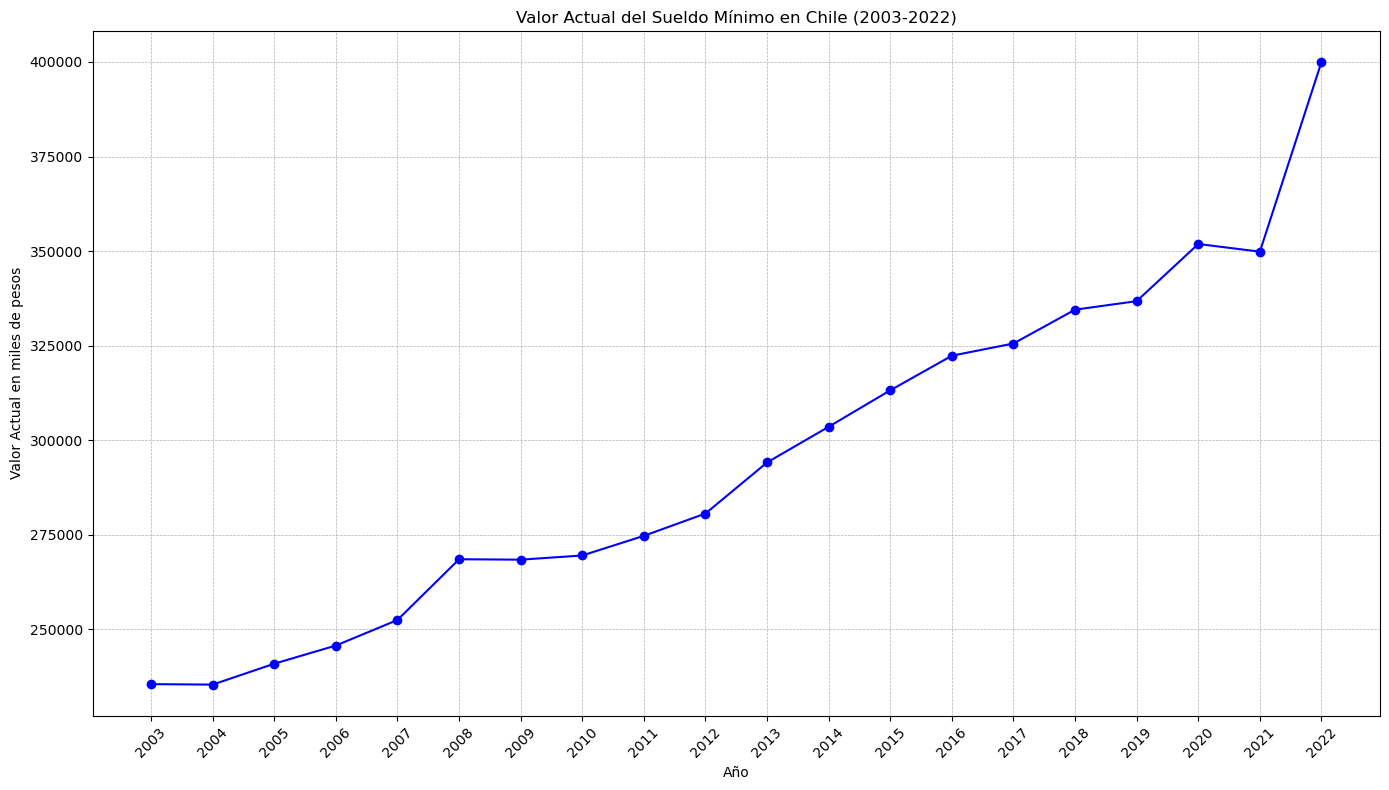

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(df["Año"], df["Valor actual"], marker='o', linestyle='-', color='b')
plt.title("Valor Actual del Sueldo Mínimo en Chile (2003-2022)")
plt.xlabel("Año")
plt.ylabel("Valor Actual en miles de pesos")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(df["Año"], rotation=45)
plt.tight_layout()

plt.show()

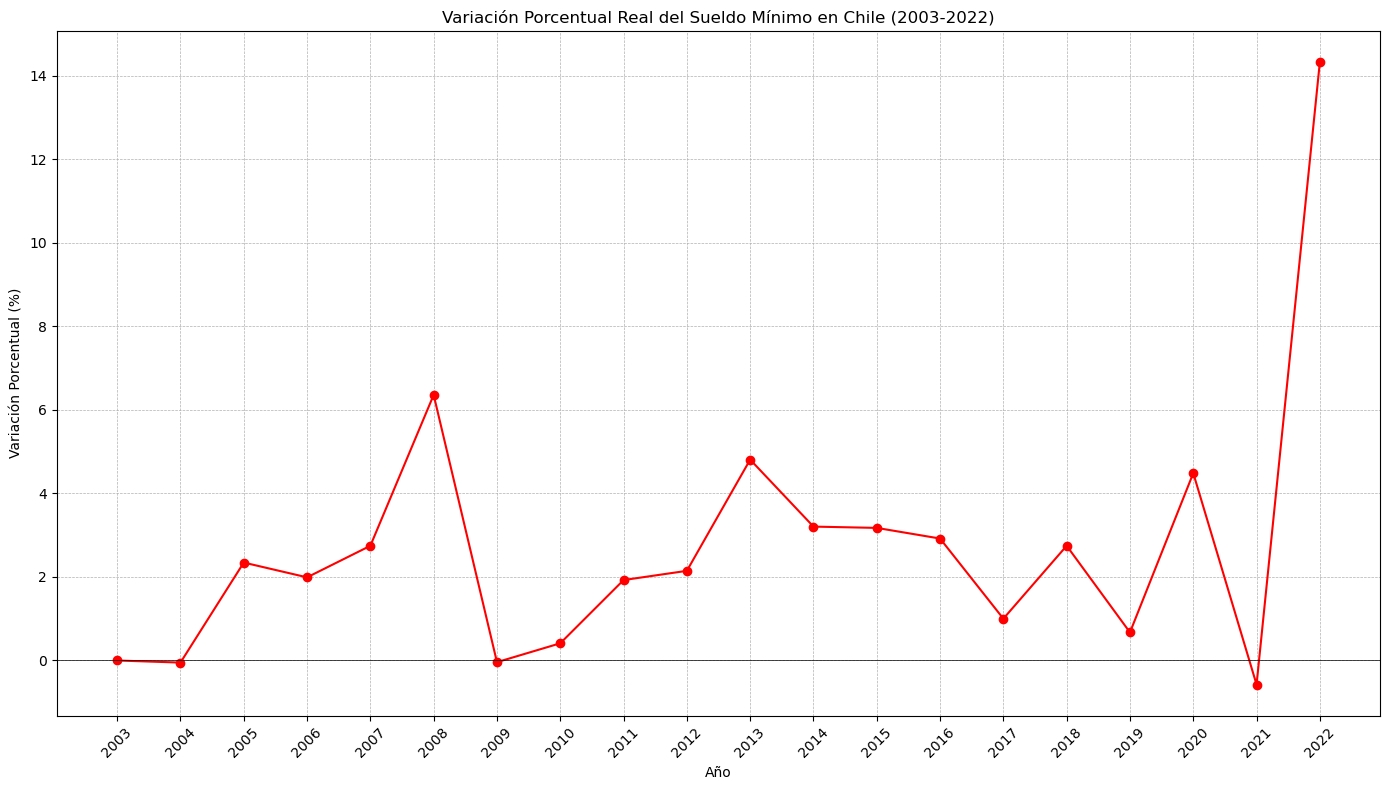

In [12]:
plt.figure(figsize=(14, 8))
plt.plot(df["Año"], df["Aumento real %"], marker='o', linestyle='-', color='r')
plt.title("Variación Porcentual Real del Sueldo Mínimo en Chile (2003-2022)")
plt.xlabel("Año")
plt.ylabel("Variación Porcentual (%)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.axhline(0, color="black",linewidth=0.5)  # Línea horizontal en el 0% para referencia
plt.xticks(df["Año"], rotation=45)
plt.tight_layout()

plt.show()

# Valor nominal del dinero

El valor nominal del dinero es aquel que no muestra el ajuste del dinero en el tiempo con el interés, es decir, que vemos cuánto vale el dinero y lo comparamos sin considerar la variable interés.

Este gráfico de barras muestra el monto del sueldo mínimo de cada año sin ajustar por inflación. Es evidente cómo el sueldo mínimo ha aumentado nominalmente con el tiempo.

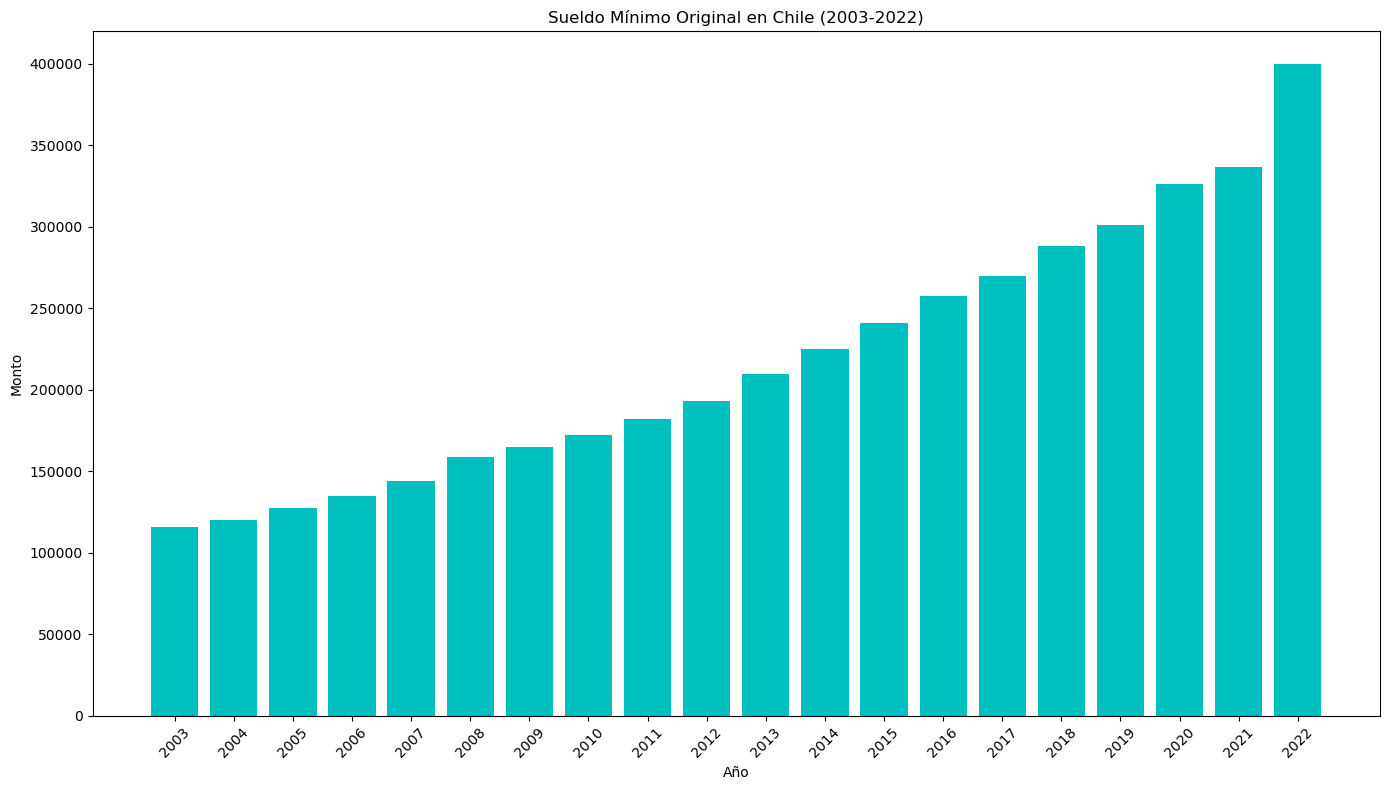

In [14]:
# Gráfico de barras del sueldo mínimo original (sin ajustar por inflación)
plt.figure(figsize=(14, 8))
plt.bar(df["Año"], df["Monto"], color='c')
plt.title("Sueldo Mínimo Original en Chile (2003-2022)")
plt.xlabel("Año")
plt.ylabel("Monto")
plt.xticks(df["Año"], rotation=45)
plt.tight_layout()
plt.show()